## **Prediction of Lung Cancer Severity using Machine Learning**


EE LIP KANG S2025541 <br>
HU LIANG LIANG S2164046 <br>
LEE YEN WEN 17179615 <br>
LOW BOON KIAT 17138399 <br>
ZHOU YAO S2177633 <br>






# CRISP-DM

**Business Understanding**

Our business is Alpha Healthcare, which provides healthcare services, such as diagnostic and health screening.



**Research Objectives**

1. To identify the attributes that could affect the severity of lung cancer.
2. To predict the severity of lung cancer using a machine learning model.

**Dataset**

Our dataset is obtained from Kaggle website: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Lung Cancer data.csv")


# Data Pre-processing

In [3]:
# Assign Male as 1 and Female as 2
df['Gender'] = df['Gender'].map({'M':1,'F':2})

**Missing Values**<br>
Check for missing values in the data frame. Result showed that there are missing values in the "Smoking" attribute.

In [ ]:
df.isnull().sum()

index                        0
Patient Id                   0
Age                          0
Gender                       0
Smoking                     39
Air Pollution                0
Alcohol use                  0
Dust Allergy                 0
OccuPational Hazards         0
Genetic Risk                 0
chronic Lung Disease         0
Balanced Diet                0
Obesity                      0
Passive Smoker               0
Chest Pain                   0
Coughing of Blood            0
Fatigue                      0
Weight Loss                  0
Shortness of Breath          0
Wheezing                     0
Swallowing Difficulty        0
Clubbing of Finger Nails     0
Frequent Cold                0
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

Mean Computation

In [ ]:
# NA values are observed in Smoking. Hence, we would first find the mean value of smoking.
average_Smoking = round(df['Smoking'].mean())
average_Smoking

4

Imputation

In [ ]:
# Then, we replace the NA values in Smoking to the mean value of Smoking
from numpy import int64
df['Smoking'] = df['Smoking'].fillna(round(df['Smoking'].mean()))
df

,index,Patient Id,Age,Gender,Smoking,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,3.0,2,4,5,4,3,...,3,4,2,2,3,1,2,3,4,3
1,1,P10,17,1,2.0,3,1,5,3,4,...,1,3,7,8,6,2,1,7,2,4
2,2,P100,35,1,2.0,4,5,6,5,5,...,8,7,9,2,1,4,6,7,2,7
3,3,P1000,37,1,7.0,7,7,7,7,6,...,4,2,3,1,4,5,6,7,5,7
4,4,P101,46,1,8.0,6,8,7,7,7,...,3,2,4,1,4,2,4,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,7.0,6,7,7,7,7,...,5,3,2,7,8,2,4,5,3,9
996,996,P996,37,2,7.0,6,8,7,7,7,...,9,6,5,7,2,4,3,1,4,9
997,997,P997,25,2,2.0,4,5,6,5,5,...,8,7,9,2,1,4,6,7,2,7
998,998,P998,18,2,8.0,6,8,7,7,7,...,3,2,4,1,4,2,4,2,3,7


Data Preprocessing - Binning

In [ ]:
# The original data shows the level of lung severity using values 1 - 9. We would perform binning to classify the values into Low, Medium, and High to show the severity of lung cancer.

import pandas as pd
import numpy as np
min_value = df['Level'].min()
max_value = df['Level'].max()
bins = np.linspace(min_value, max_value, 4)
labels = ['Low', 'Medium', 'High']
df['Level'] = pd.cut(df['Level'], bins=bins, labels=labels, include_lowest=True)
df.head(10)

,index,Patient Id,Age,Gender,Smoking,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,3.0,2,4,5,4,3,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,2.0,3,1,5,3,4,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,2.0,4,5,6,5,5,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7.0,7,7,7,7,6,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,8.0,6,8,7,7,7,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,2.0,4,5,6,5,5,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,3.0,2,4,5,4,3,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,1.0,3,1,4,3,2,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,6.0,4,5,6,5,6,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2.0,2,3,4,2,4,...,1,2,4,6,5,4,2,1,5,Medium


Data Preprocessing - Normalization

Zscore

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(df['Alcohol use']).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['z score'] = X_scaled.reshape(1,-1)[0]
df

,index,Patient Id,Age,Gender,Smoking,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,z score
0,0,P1,33,1,3.0,2,4,5,4,3,...,4,2,2,3,1,2,3,4,Low,-0.214954
1,1,P10,17,1,2.0,3,1,5,3,4,...,3,7,8,6,2,1,7,2,Medium,-1.360357
2,2,P100,35,1,2.0,4,5,6,5,5,...,7,9,2,1,4,6,7,2,High,0.166847
3,3,P1000,37,1,7.0,7,7,7,7,6,...,2,3,1,4,5,6,7,5,High,0.930449
4,4,P101,46,1,8.0,6,8,7,7,7,...,2,4,1,4,2,4,2,3,High,1.312250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,7.0,6,7,7,7,7,...,3,2,7,8,2,4,5,3,High,0.930449
996,996,P996,37,2,7.0,6,8,7,7,7,...,6,5,7,2,4,3,1,4,High,1.312250
997,997,P997,25,2,2.0,4,5,6,5,5,...,7,9,2,1,4,6,7,2,High,0.166847
998,998,P998,18,2,8.0,6,8,7,7,7,...,2,4,1,4,2,4,2,3,High,1.312250


In [ ]:
df['z score'].std()

1.0005003753127735

Single Feature Scaling

In [ ]:
# We would normalise the Air Pollution

from sklearn.preprocessing import MaxAbsScaler
X = np.array(df['Air Pollution']).reshape(-1,1)
scaler = MaxAbsScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['single feature scaling'] = X_scaled.reshape(1,-1)[0]
df
df['single feature scaling'].max()

1.0

**Duplicate Rows**<br>
Check for duplicate rows in the data frame. Result showed there is no duplicate row in the data frame.

In [ ]:
# Check for duplicate values

df[df.duplicated()]

,index,Patient Id,Age,Gender,Smoking,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,z score,single feature scaling


**Outliers <br>**
Plot boxplots to identify outliers for each variable. Results showed that most variables do not have outliers, except age.

In [ ]:
# Import plt
import matplotlib.pyplot as plt

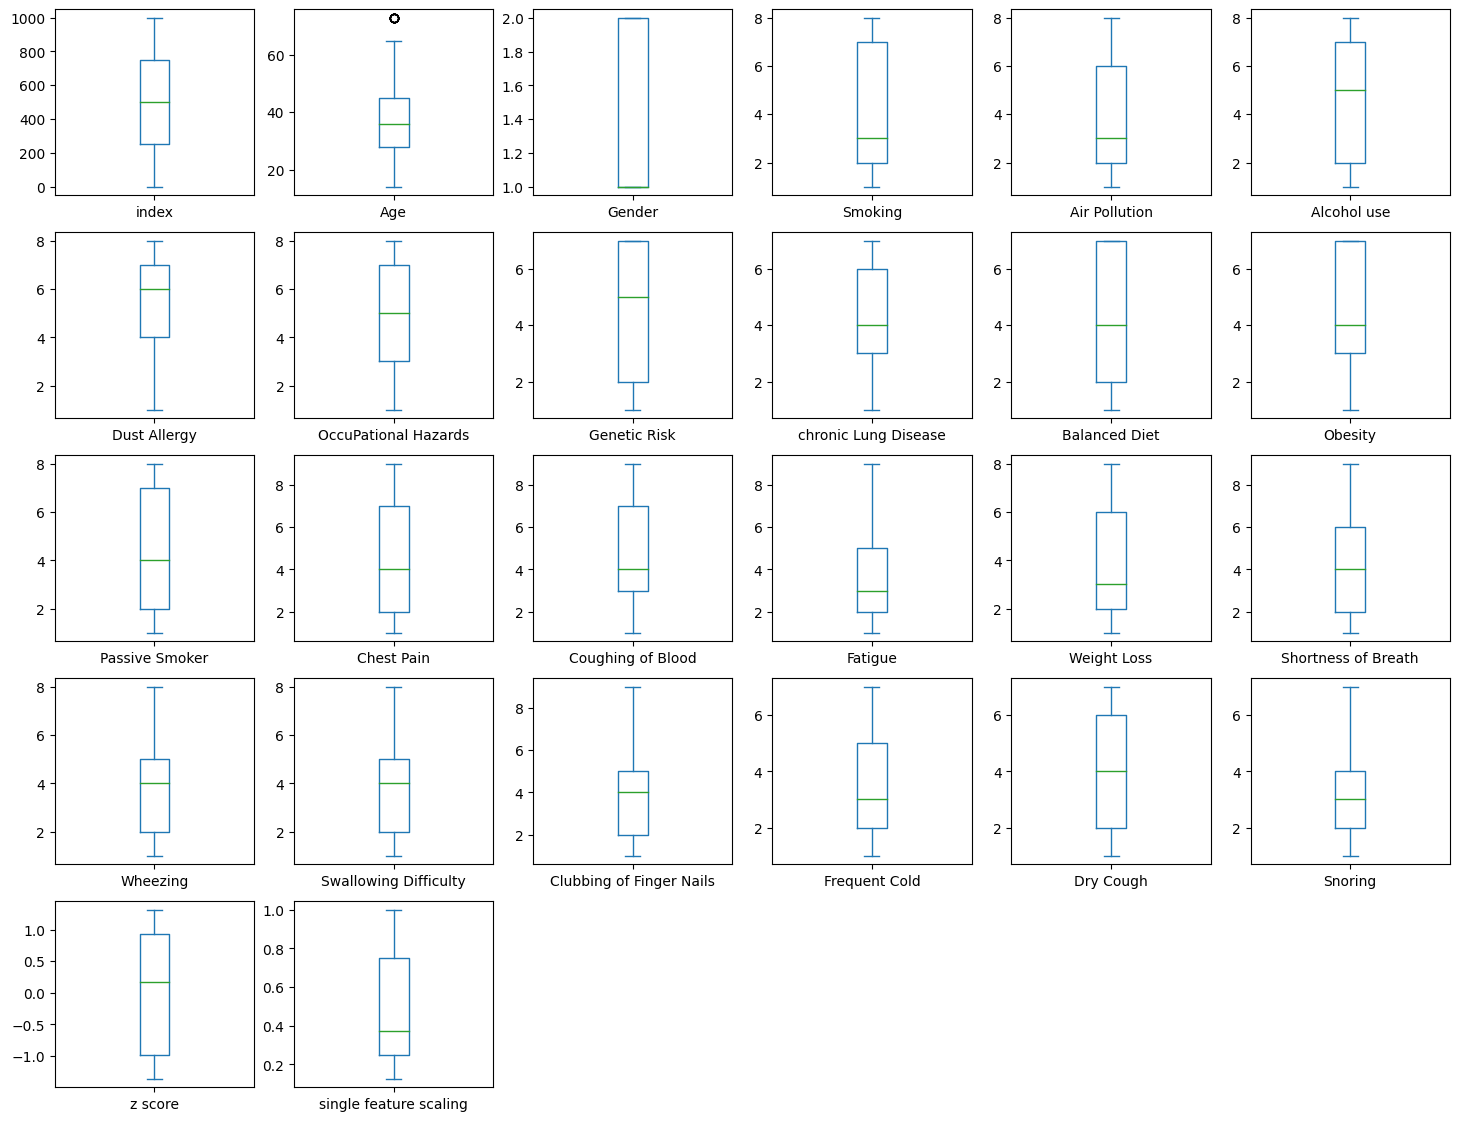

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,6), figsize=(18,14))
plt.show()

<Axes: >

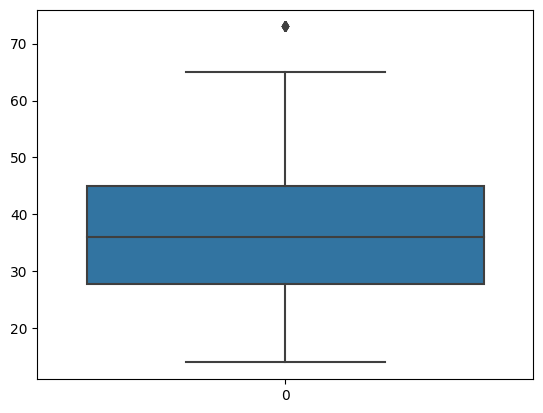

In [ ]:
# To check the distribution and outlier in age. In the diagram, it could be observed that there are outliers at age >70 years old.
import seaborn as sns
sns.boxplot(df['Age'])

Detect the outliers using IQR and remove them.

In [ ]:

import sklearn
import numpy as np
# Print the shape of the DataFrame
print("Old Shape: ", df.shape)

# IQR
# Calculate the upper and lower limits
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Age']>=upper)[0]
lower_array = np.where(df['Age']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (1000, 28)
1.875
70.875
New Shape:  (990, 28)


# Exploratory Data Analysis

**Summary Statistics**<br>
Calculate summary statistics for the data frame.

In [ ]:
df.describe()

,index,Age,Gender,Smoking,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,z score,single feature scaling
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,499.474747,36.812121,1.406061,3.907071,3.828283,4.548485,5.156566,4.838384,4.565657,4.373737,...,3.863636,4.222222,3.794949,3.773737,3.942424,3.561616,3.831313,2.935354,-0.005542,0.478535
std,288.694136,11.510010,0.491344,2.474838,2.037269,2.629684,1.989033,2.118373,2.132903,1.856782,...,2.215989,2.289712,2.044345,2.264894,2.392210,1.823823,2.037770,1.479165,1.004016,0.254659
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.360357,0.125000
25%,250.250000,27.000000,1.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-0.978556,0.250000
50%,499.500000,35.000000,1.000000,3.000000,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.166847,0.375000
75%,748.750000,45.000000,2.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,0.930449,0.750000
max,999.000000,65.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.312250,1.000000


**Chi Square Test**<br>
Perform Chi Square test to determine whethere there is an association between two categorical variables. <br>
(i) Gender vs. Severity of Lung cancer


In [ ]:
from scipy.stats import chi2_contingency
# create contigency table for Gender vs Level
info = pd.crosstab(index=df['Gender'], columns=df['Level'])
info

Level,Low,Medium,High
Gender,,,
1,149,187,252
2,154,135,113


In [ ]:
# perform chi square
print(info.values.tolist())
chi2, p, dof, expctd = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Gender and Level are NOT independent of each other.'
  )
else:
    print(
      'Gender and Level are independent of each other'
  )

[[149, 187, 252], [154, 135, 113]]
chi2 value:  27.437310020973918
p value:  1.101701218605843e-06
dof value:  2
Gender and Level are NOT independent of each other.


**Change Data Type**<br>
Change the data type of "Level" from dtype=object to dtype=int. Purpose is to include "Level" in correlation heat map.

In [ ]:
df['Level'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
df['Level'].replace(['Low', 'Medium','High'], [1, 2, 3], inplace=True)

In [ ]:
df['Level'].unique()

[1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

In [ ]:
import numpy as np
df['Level']=np.array(df['Level'])

In [ ]:
df['Level'].unique()

array([1, 2, 3])

**Heat Map** <br>
Plot heat map to show the strength of correlation between all variables in the data frame.

<ipython-input-24-c352d8a7ed80>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr")


Text(0.5, 1.0, 'Correlation Heatmap')

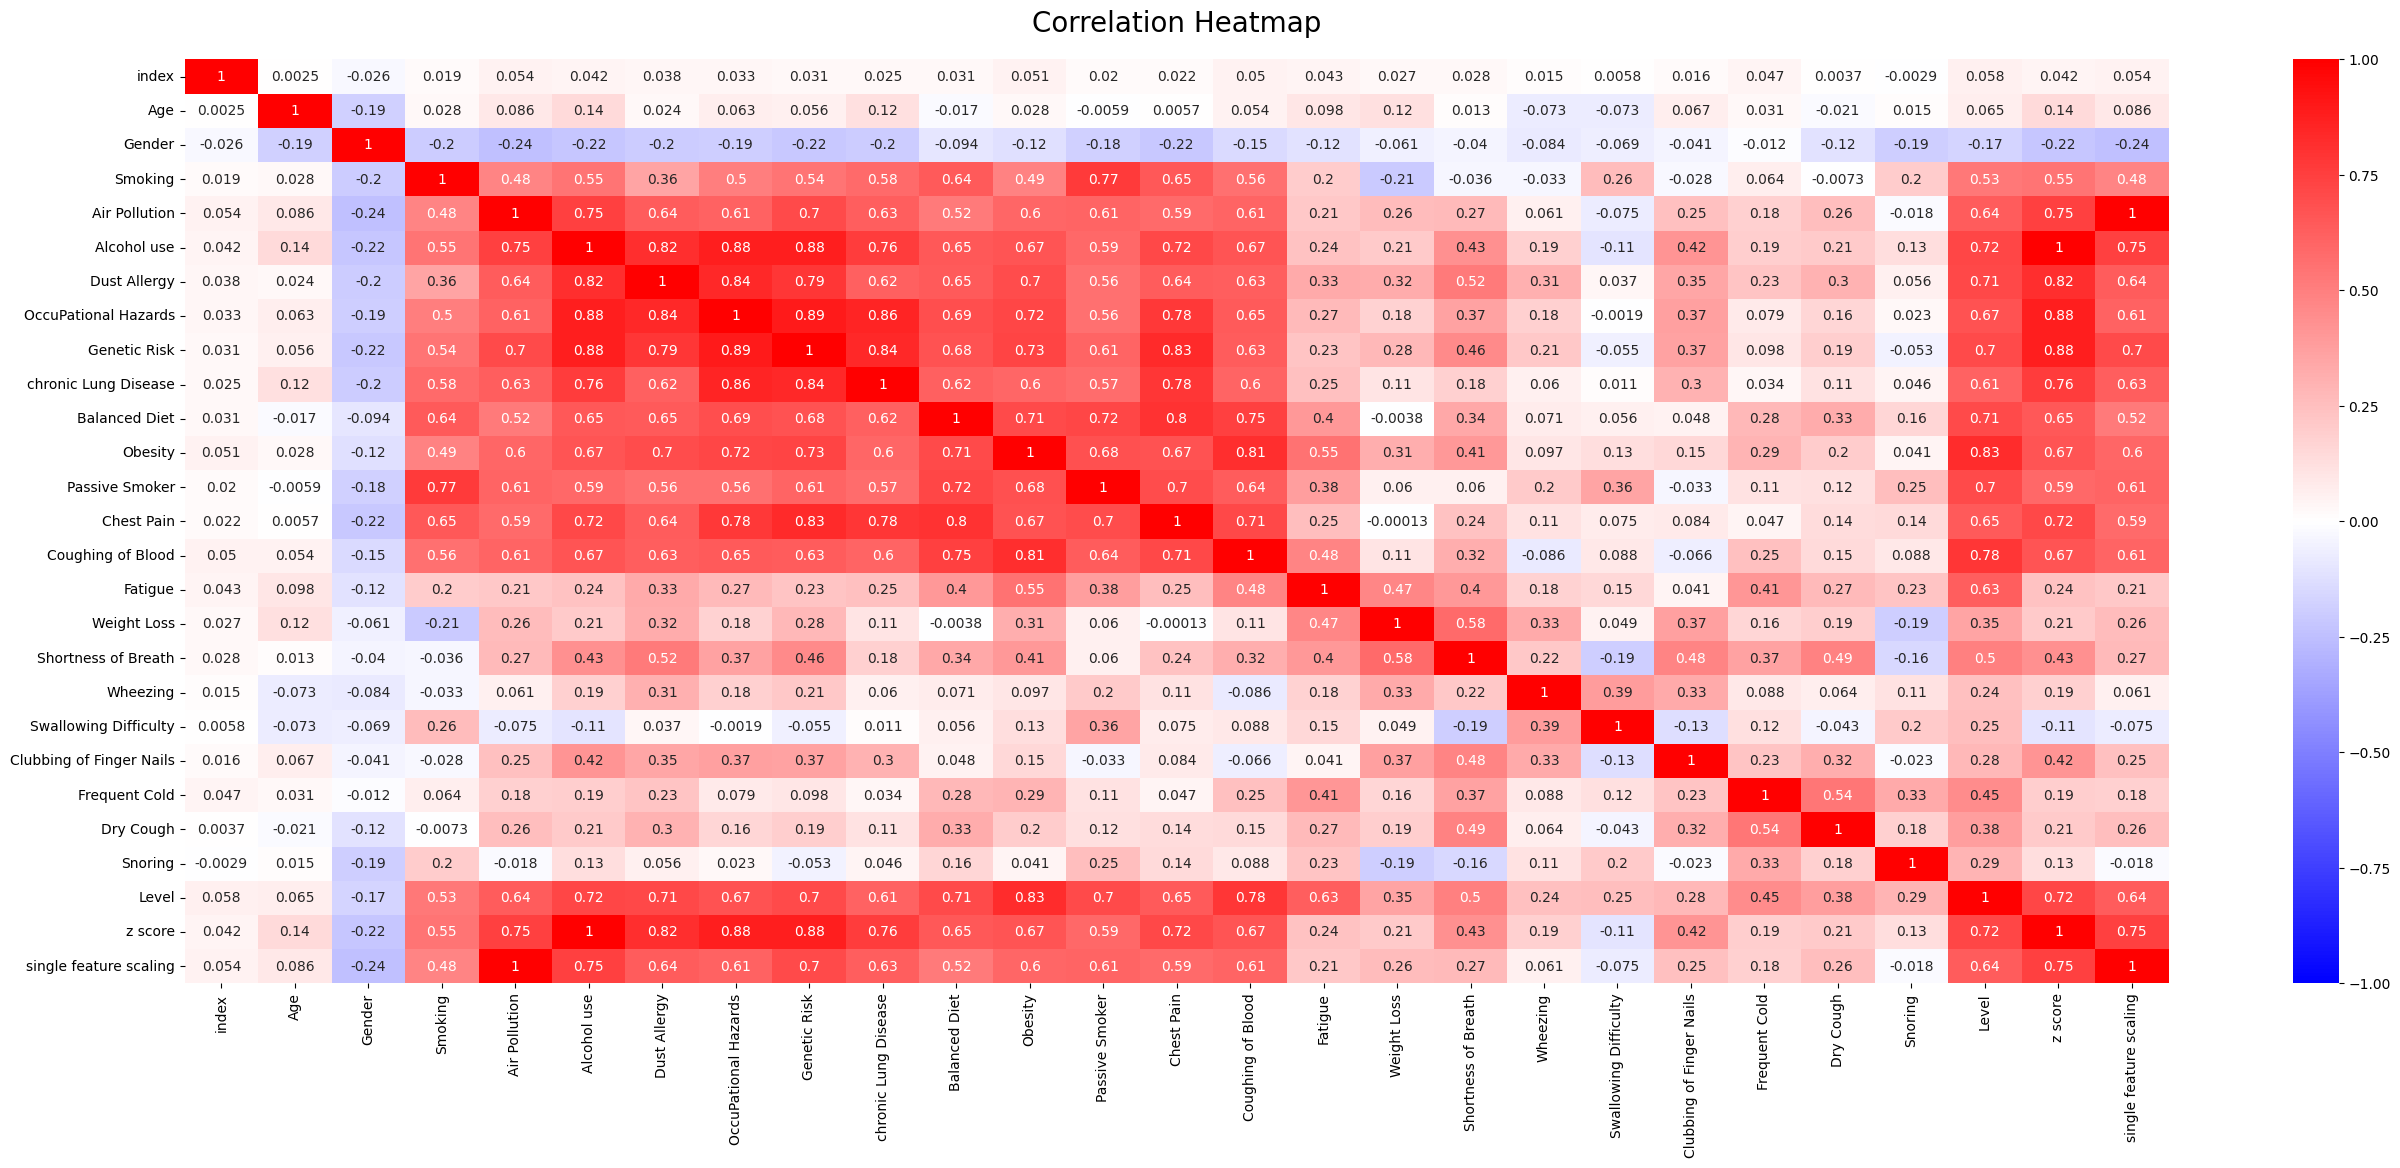

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(32,12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

Plot heat map that shows the strength of correlation between each independent variable and the dependent variable (Level).

<ipython-input-25-6a1ed5c56dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


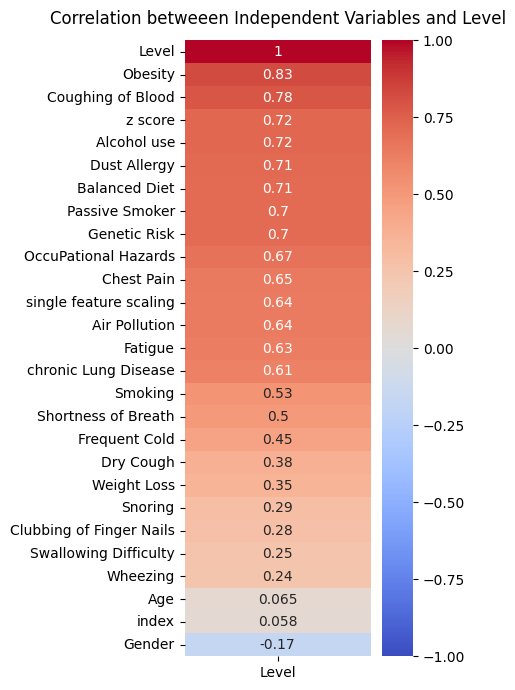

In [ ]:
plt.figure(figsize=(3, 8))#
heatmap = sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation betweeen Independent Variables and Level', fontdict={'fontsize':12}, pad=12);

**Histogram** <br>
Plot histogram to show the distribution of data for each variable.

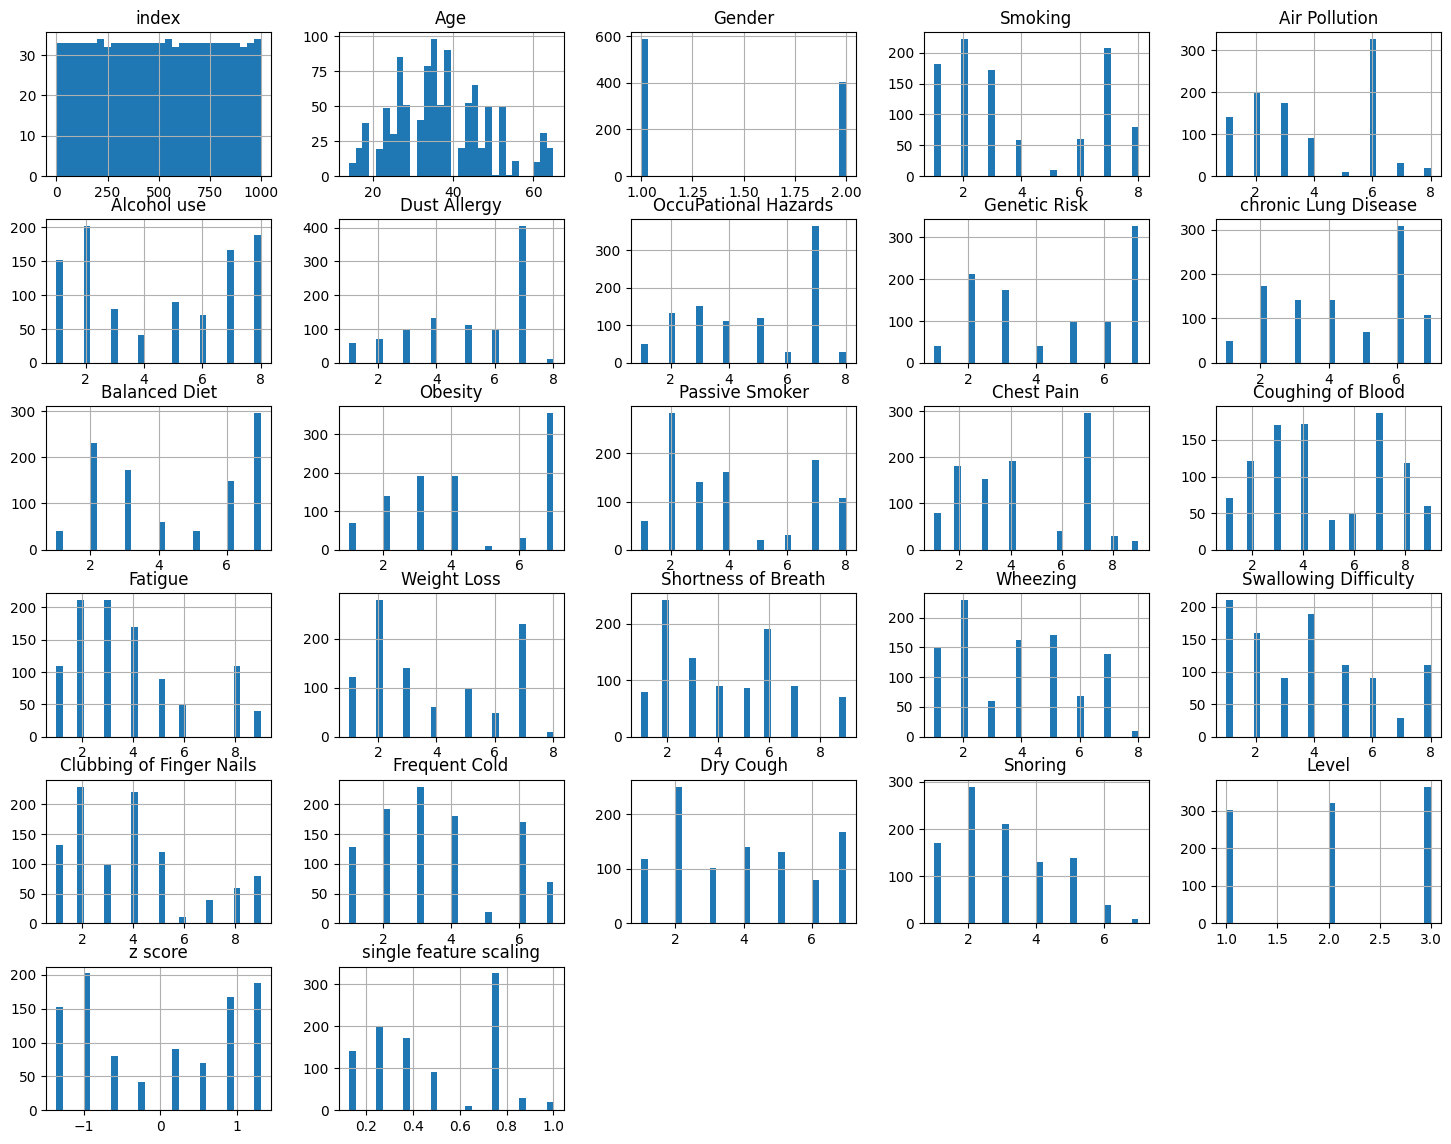

In [ ]:
df.hist(bins=30, figsize=(18,14))
plt.show()

**Violin Plot**<br>
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

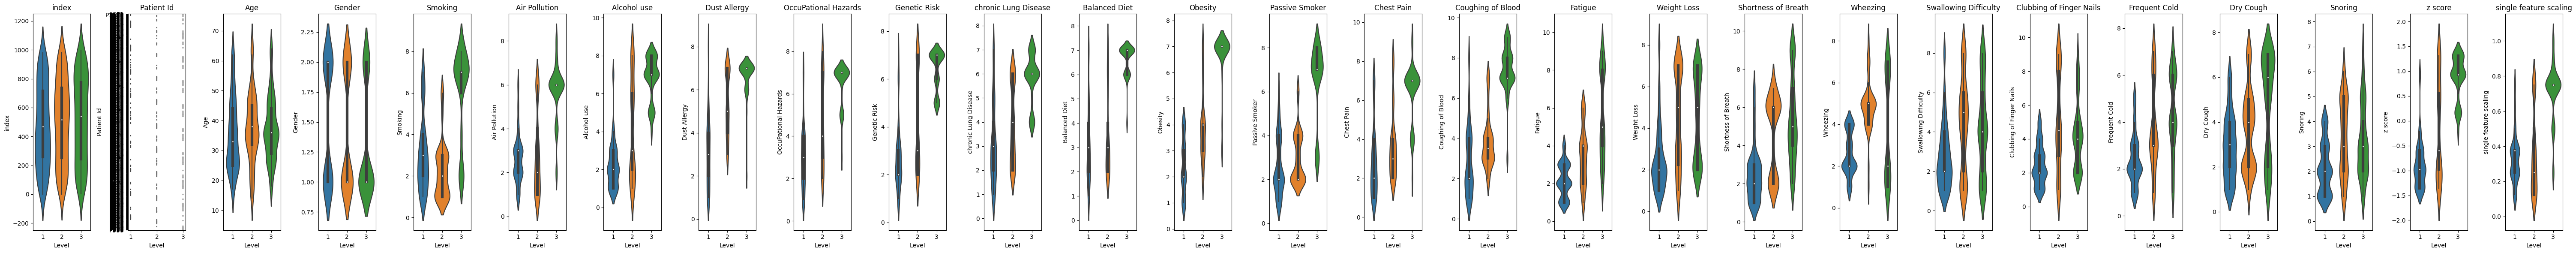

In [ ]:
# Extracting column names except for Level
columns = list(df.columns)
columns.remove('Level')

# Creating subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(60, 6))

# Looping through each column and creating a violin plot
for i, column in enumerate(columns):
    sns.violinplot(x="Level", y=column, data=df, ax=axes[i])
    axes[i].set_title(column)

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()


Findings from Violin Plot: <br>


-Level 1 (C1) cancer has a higher incidence in the range of 20-30 years. Cancer Level 2 (C2) and Level 3 (C3) have a higher incidence in the range of 30-50 years.

-C3 has more incidence in gender 1 (the dataset does not specify which sex gender 1/2 corresponds to).

-C3 appears more with higher levels of air pollution. C1 appears more when air pollution is low.

-C3 appears more with higher Alcohol Consumption. C1 appears more when alcohol consumption is low.

-C3 appears more in patients with high Dust Allergy.

-C3 appears more in people with Occupational Hazards.

-Have Genetic Risk impacts on the Cancer Level.

-C3 appears more in patients with various Chronic Lung Diseases.

-An Unbalanced Diet favors C3 (note that in the dataframe the column is called 'Balanced Diet' but it corresponds to a Diet Imbalance).<br>

-C3 appears more in patients with severe obesity.

-C3 appears more in patients who are smokers or passive smokers.

-C3 causes more chest pain, coughing up blood, tiredness and dry cough. C1 patients do not experience high levels of chest pain, fatigue, weight loss, shortness of breath, wheezing, difficult swallowing, clubbing, cold, dry cough, or snoring.

**Histogram**<br>
Level 1 cancer has a higher incidence in the range of 20-30 years. Level 2 cancer and Level 3 cancer have a higher incidence in the range of 30-50 years.

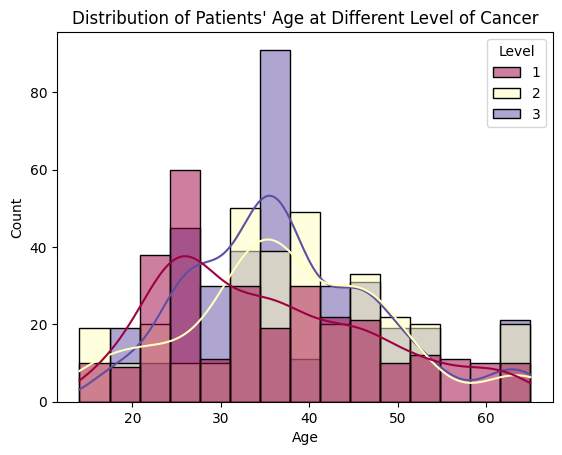

In [ ]:
sns.histplot(data=df, x='Age', hue='Level', kde=True, palette="Spectral").set_title("Distribution of Patients' Age at Different Level of Cancer")
plt.show()

Level 3 cancer appears more in patients with high dust allergy.

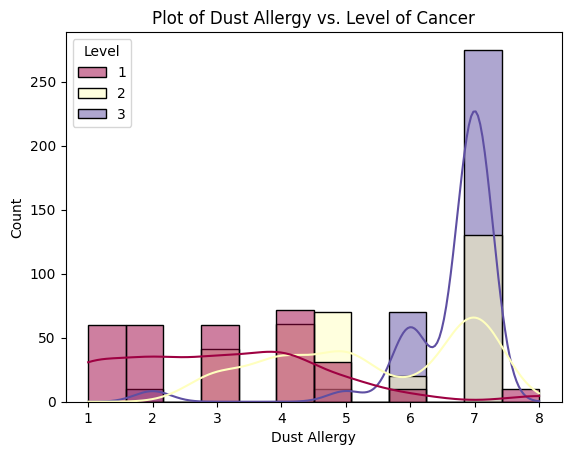

In [ ]:
sns.histplot(data=df, x='Dust Allergy', hue='Level', kde=True, palette="Spectral").set_title("Plot of Dust Allergy vs. Level of Cancer")
plt.show()

Level 3 cancer appears more in patients with severe obesity.

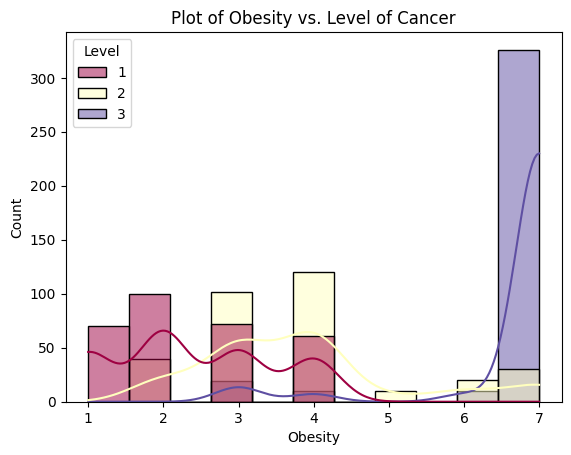

In [ ]:
sns.histplot(data=df, x='Obesity', hue='Level', kde=True, palette="Spectral").set_title("Plot of Obesity vs. Level of Cancer")
plt.show()

Level 3 cancer causes more chest pain.

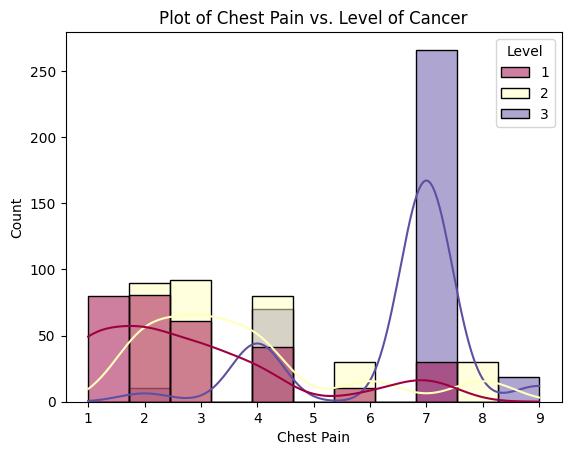

In [ ]:
sns.histplot(data=df, x='Chest Pain', hue='Level', kde=True, palette="Spectral").set_title("Plot of Chest Pain vs. Level of Cancer")
plt.show()

**Bar Chart**<br>
Level 3 cancer has more incidence in male, while level 1 cancer has more incidence in female.

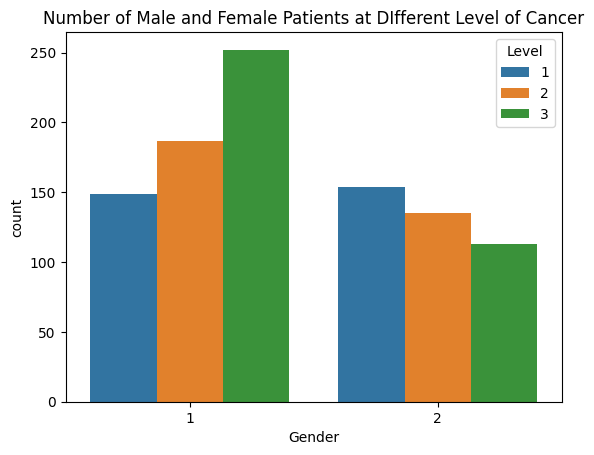

In [ ]:
sns.countplot(df,x='Gender',hue='Level').set_title('Number of Male and Female Patients at DIfferent Level of Cancer')
plt.show()

Level 3 cancer appears more in people with occupational hazards.

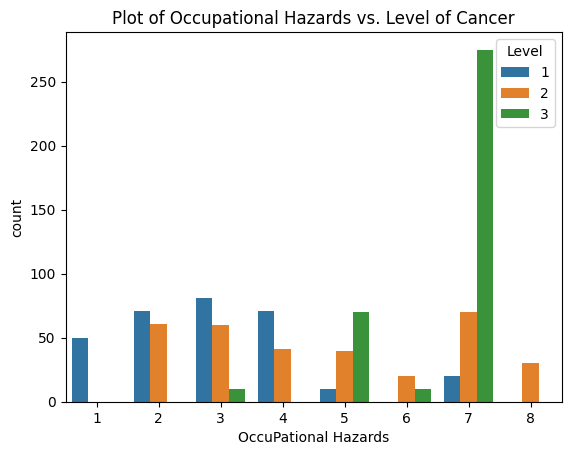

In [ ]:
sns.countplot(df,x='OccuPational Hazards',hue='Level').set_title('Plot of Occupational Hazards vs. Level of Cancer')
plt.show()

Level 3 cancer appears more in patients who are passive smokers.

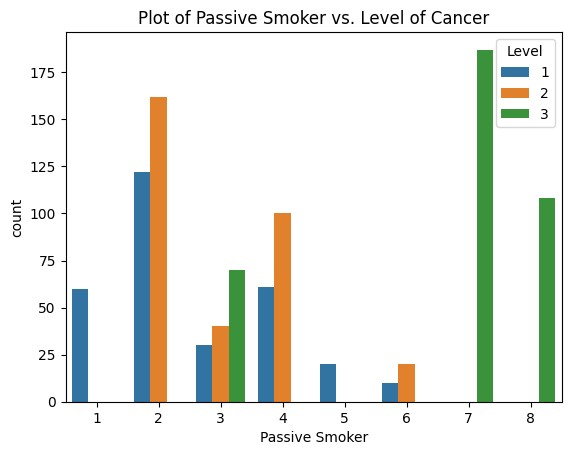

In [ ]:
sns.countplot(df,x='Passive Smoker',hue='Level').set_title('Plot of Passive Smoker vs. Level of Cancer')
plt.show()

Level 3 cancer patients experiencing high levels of fatigue.

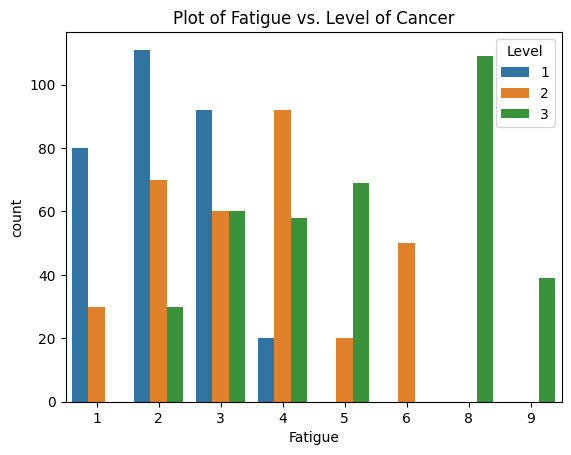

In [ ]:
sns.countplot(df,x='Fatigue',hue='Level').set_title('Plot of Fatigue vs. Level of Cancer')
plt.show()

**Multiseries Line Graph** <br>
Level 3 cancer appears more in patients with high alcohol consumption. Level 1 cancer appears more when alcohol consumption is low.

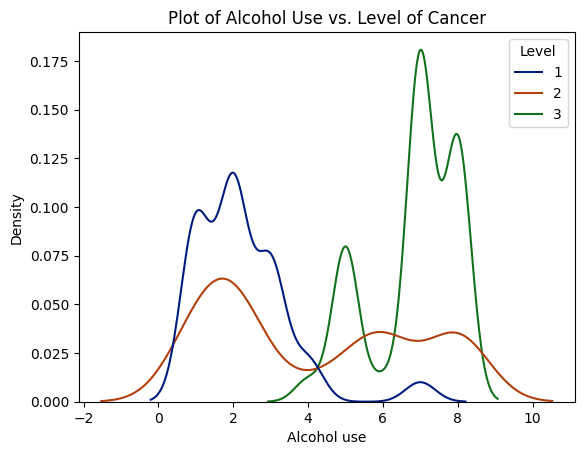

In [ ]:
sns.kdeplot(df, x='Alcohol use', hue='Level',palette='dark').set_title('Plot of Alcohol Use vs. Level of Cancer')
plt.show()

Level 3 cancer appears more in patients with high genetic risk.

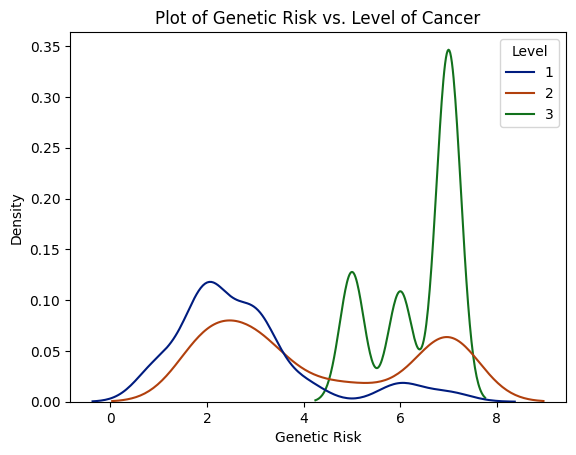

In [ ]:
sns.kdeplot(df, x='Genetic Risk', hue='Level',palette='dark').set_title('Plot of Genetic Risk vs. Level of Cancer')
plt.show()

-An unbalanced diet favors Level 3 cancer (note that in the dataframe the column is called 'Balanced Diet' but it corresponds to a Diet Imbalance).

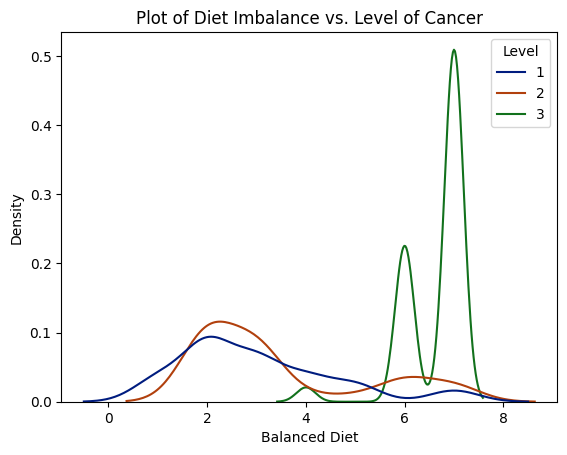

In [ ]:
sns.kdeplot(df, x='Balanced Diet', hue='Level',palette='dark').set_title('Plot of Diet Imbalance vs. Level of Cancer')
plt.show()

Level 3 cancer appears more in patients who are smokers.

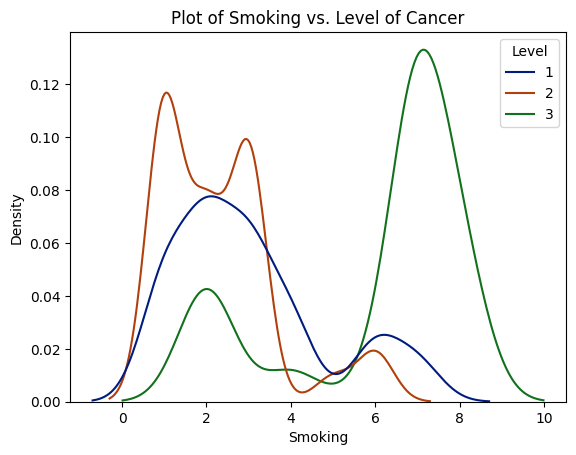

In [ ]:
sns.kdeplot(df, x='Smoking', hue='Level',palette='dark').set_title('Plot of Smoking vs. Level of Cancer')
plt.show()

Level 2 and Level 3 cancer appears more in patients with shortness of breath.

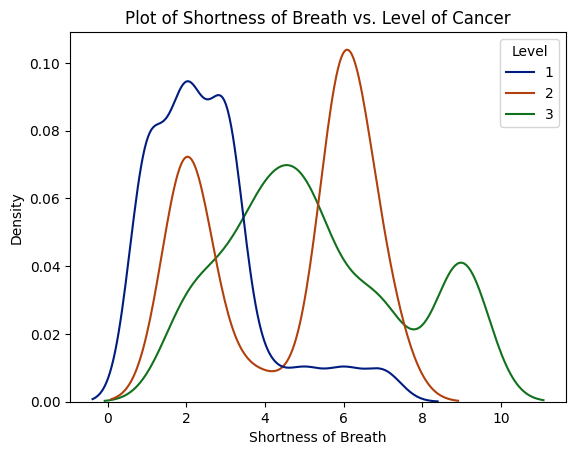

In [ ]:
sns.kdeplot(df, x='Shortness of Breath', hue='Level',palette='dark').set_title('Plot of Shortness of Breath vs. Level of Cancer')
plt.show()

**Scatter Plot**<br>
Level 3 cancer appears more in patienst under high levels of air pollution. Level 1 cancer appears more when air pollution is low.

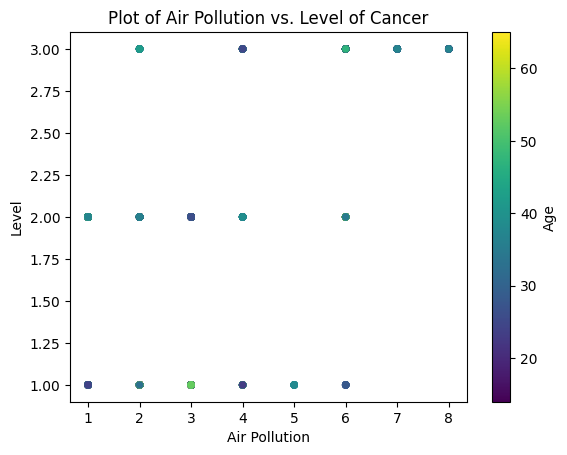

In [ ]:
df.plot.scatter(x='Air Pollution', y='Level', c='Age', colormap='viridis').set_title('Plot of Air Pollution vs. Level of Cancer')
plt.show()

Level 3 cancer appears more in patients with various chronic lung diseases.

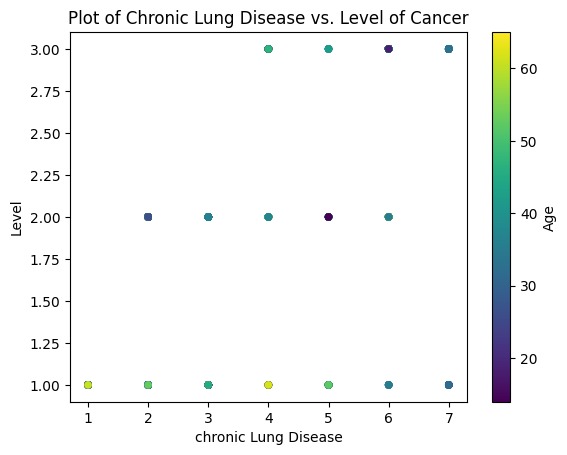

In [ ]:
df.plot.scatter(x='chronic Lung Disease', y='Level', c='Age', colormap='viridis').set_title('Plot of Chronic Lung Disease vs. Level of Cancer')
plt.show()

Level 3 cancer appears more in patients who frequently cough blood.

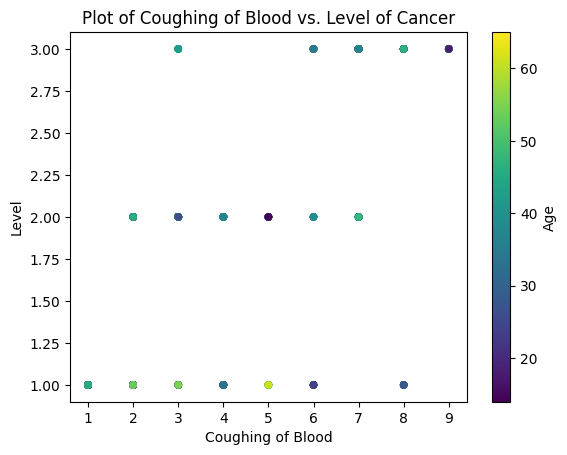

In [ ]:
df.plot.scatter(x='Coughing of Blood', y='Level', c='Age', colormap='viridis').set_title('Plot of Coughing of Blood vs. Level of Cancer')
plt.show()

**Pie Chart**<br>
The proportion of Level 1, Level 2 and Level 3 cancer patients  in the dataset is almost equivalent.

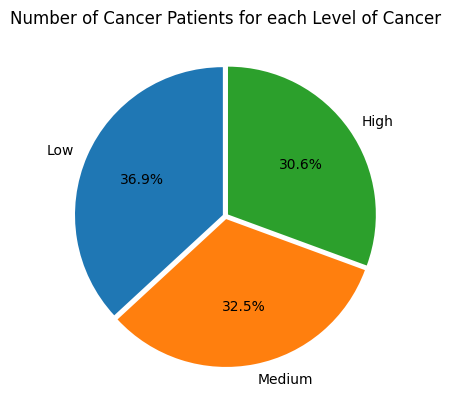

In [ ]:
labels = ['Low','Medium','High']
sizes = df['Level'].value_counts()
explode = (0.02, 0.02, 0.02)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title("Number of Cancer Patients for each Level of Cancer")
plt.show()

# Modeling

Modeling
split 70/30
train model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

df.columns
# check
features = ['Obesity', 'Coughing of Blood',
            'Alcohol use',
            'Dust Allergy', 'Balanced Diet', 'Passive Smoker', 'Genetic Risk', 'OccuPational Hazards', 'Chest Pain',
            'Air Pollution', 'Fatigue', 'chronic Lung Disease', 'Smoking']  # Select the desired features

# Define the weightage for each feature
feature_weights = {'Obesity': 0.83, 'Coughing of Blood':0.78, 'Alcohol use':0.72, 'Dust Allergy':0.71, 'Balanced Diet':0.71,
                   'Passive Smoker':0.7, 'Genetic Risk':0.7, 'OccuPational Hazards':0.67, 'Chest Pain':0.65,
                   'Air Pollution': 0.64,'Fatigue':0.63, 'chronic Lung Disease': 0.61}

target = 'Level'

# Split the dataset into features (X) and target variable (y)
X = df[feature_weights]
y = df[target]

# # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')
y_test.value_counts()

Shapes - X Training: (693, 12) and X Testing (297, 12)
Shapes - Y Training: (693,) and Y Testing (297,)


<ipython-input-44-7dc689210eba>:20: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[feature_weights]


3    121
1     90
2     86
Name: Level, dtype: int64

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Accuracy: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00       121

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model = LogisticRegression(max_iter=3000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Accuracy: 1.0
              precision    recall  f1-score   support

           1       0.94      0.86      0.90        90
           2       0.86      0.94      0.90        86
           3       1.00      1.00      1.00       121

    accuracy                           0.94       297
   macro avg       0.93      0.93      0.93       297
weighted avg       0.94      0.94      0.94       297

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


**Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a Logistic Regression model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.8080808080808081
              precision    recall  f1-score   support

           1       0.80      0.87      0.83        90
           2       0.72      0.59      0.65        86
           3       0.86      0.92      0.89       121

    accuracy                           0.81       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.80      0.81      0.80       297



# Result Evaluation & Interpretation

Model Selection

As we evaluate the parameters of the four models selected above on the test set, we will compare the data to select the optimal model:

1. We can observe that the **decision tree and random forest** models achieve an accuracy of 1.0 on both the training and test sets. However, this high accuracy may indicate **overfitting**, where these models memorize the noise and randomness in the training data, leading to an **overly optimistic performance**. Consequently, the decision tree and random forest models tend to overfit the relationship between the features and labels in the training data and may fail to generalize well to new data.

2. The **decision tree and random forest models**, despite their 1.0 accuracy on "High", "Medium", and "Low", also have the potential risk of data leakage. It is possible that the information from the test set inadvertently influenced the model during the training phase, resulting in an **overly optimistic performance** on the test set. Moreover, these models often exhibit high complexity and limited interpretability, making it challenging to identify the most influential features. Thus, we have decided to exclude the decision tree and random forest models from consideration.

3. The **Gaussian Naive Bayes model** achieves an **accuracy of 0.80, significantly lower** than the other models. Particularly, its performance in the "Medium" category is subpar, with a recall of only 0.58. This low result value may suggest **frequent false negatives and false positives** when the model predicts the "Medium" category. Therefore, we have also opted to discard the Gaussian Naive Bayes model.

4. On the other hand, the **logistic regression model** achieves an **accuracy of 0.96** on the test set, slightly lower than the decision tree and random forest models but still high and more likely to generalize to unseen data. Although the recall for the "Low" category is 0.86, it performs relatively well on the "High" and "Medium" categories, with an overall satisfactory recall and a balanced set of parameters.In summary, the logistic regression model demonstrates **overall high accuracy, precision, recall, and F1-score** on the test set.

5. The logistic regression model is a linear model that offers interpretable prediction results based on the weighting coefficients. Given the richer feature values in our data, it allows us to better understand the impact of each feature on the prediction results and gain deeper insights into the problem. In contrast, the decision tree and random forest models have limited interpretability and struggle to provide clear explanations of the features.

6. Considering these factors, we have **ultimately selected the logistic regression model** as our prediction model.





# Model Deployment

Deploy the user input interface according to the selected model:


In [ ]:
import ipywidgets as widgets
import pandas as pd

# Create sliders for each feature
obesity_slider = widgets.IntSlider(min=0, max=10, description='Obesity')
coughing_slider = widgets.IntSlider(min=0, max=10, description='Coughing of Blood')
alcohol_slider = widgets.IntSlider(min=0, max=10, description='Alcohol use')
dust_slider = widgets.IntSlider(min=0, max=10, description='Dust Allergy')
balanced_slider = widgets.IntSlider(min=0, max=10, description='Balanced Diet')
passive_slider = widgets.IntSlider(min=0, max=10, description='Passive Smoker')
genetic_slider = widgets.IntSlider(min=0, max=10, description='Genetic Risk')
occupational_slider = widgets.IntSlider(min=0, max=10, description='OccuPational Hazards')
chest_slider = widgets.IntSlider(min=0, max=10, description='Chest Pain')
air_slider = widgets.IntSlider(min=0, max=10, description='Air Pollution')
fatigue_slider = widgets.IntSlider(min=0, max=10, description='Fatigue')
lung_slider = widgets.IntSlider(min=0, max=10, description='Chronic Lung Disease')
smoking_slider = widgets.IntSlider(min=0, max=10, description='Smoking')

# Create a button to trigger predictions
button = widgets.Button(description='Predict')

def predict_button_clicked(button):
    # Retrieve the slider values
    obesity = obesity_slider.value
    coughing = coughing_slider.value
    alcohol = alcohol_slider.value
    dust = dust_slider.value
    balanced = balanced_slider.value
    passive = passive_slider.value
    genetic = genetic_slider.value
    occupational = occupational_slider.value
    chest = chest_slider.value
    air = air_slider.value
    fatigue = fatigue_slider.value
    lung = lung_slider.value
    smoking = smoking_slider.value

    # Create a DataFrame with the user input
    user_input = pd.DataFrame([[obesity, coughing, alcohol, dust, balanced, passive, genetic, occupational,
                                chest, air, fatigue, lung, smoking]], columns=features)

    # Use the trained logistic regression model to make predictions
    y_pred = model.predict(user_input)
    print('Predicted Level:', y_pred[0])


# Register the button's callback function
button.on_click(predict_button_clicked)

# Display the sliders and button with a title
title_widget = widgets.HTML("<h2>Prediction of Lung Cancer Severity</h2>")
widgets.VBox([title_widget, obesity_slider, coughing_slider, alcohol_slider, dust_slider, balanced_slider,
              passive_slider, genetic_slider, occupational_slider, chest_slider, air_slider,
              fatigue_slider, lung_slider, smoking_slider, button])

# Reseach Limitations

Our current dataset comprise of all patients with lung cancer. We could only predict the severity of lung cancer. In future research, to improve our modelling, we could find and obtain a larger dataset that consists of individuals without lung cancer and with lung cancer. By doing so, we could predict the possibility of lung cancer occurrence in individuals.

# Members' Contribution


**LEE YEN WEN 17179615** <br>
- CRISP DM + PRESENTATION <br>


**ZHOU YAO S2177633** <br>
- DATA PREPROCESSING


**LOW BOON KIAT 17138399** <br>
- EXPLORATORY DATA ANALYSIS


**EE LIP KANG S2025541** <br>
- MACHINE LEARNING MODELLING


**HU LIANG LIANG S2164046** <br>
- RESULT EVALUATION & INTERPRETATION

